<a href="https://colab.research.google.com/github/chiokkimyip/TensorFlow/blob/main/Image_Classification_Ultimate_KYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultimate Image Classification TensorFlow - Kim Yip Chiok

Introduction of the Food101 classification project


**Step-by-step:** (all the section use ##)
* Import the libraries
* Create helper functions
* Choose different set/size of the data
  * 101 Food Classes: Working with less data
  * etc
* Download and preprocess the data (become one with the data)
  * from google drive (preformatted)
  * from github (`!wget link`)
  * from TensorFlow Dataset `TFDS`
* Visualize the images
* Create a modelling callbacks
* Build a transfer learning model using the Keras Functional API
* Build a series of model, compile, fit, evaluate
  * Base model - type it out
  * Base model - with transfer learning
  * Model with data augmentation
  * Fine-tuning
* Results Analysis
  * Plot and loss curves
  * Make predictions with our trained model
  * Visualizing the predictions on test images
  * Confusion Matrix
  * Find the most wrong predictions
* Save and export the training results to TensorBoard





**Steps in building a transfer learning model:**



## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

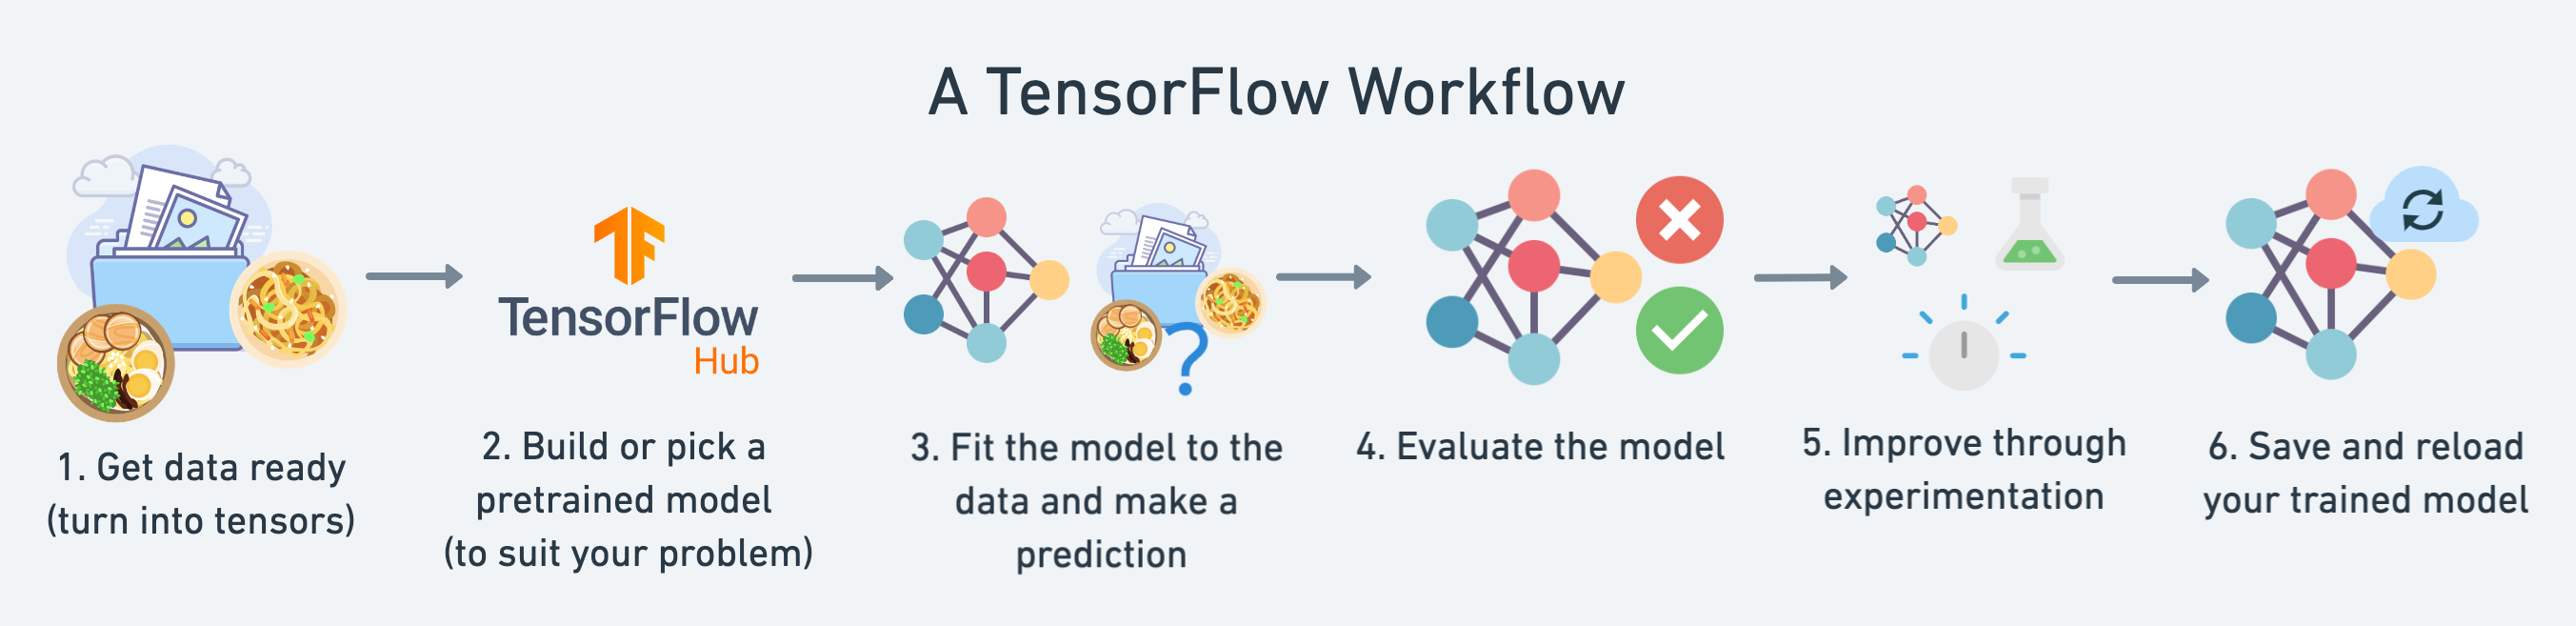

## Create Helper Functions

In [ ]:
# Get helper functions file
!wget https://raw.githubusercontent.com/chiokkimyip/TensorFlow/main/helper_functions.py

--2022-12-08 06:12:04--  https://raw.githubusercontent.com/chiokkimyip/TensorFlow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12023 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.74K  --.-KB/s    in 0s      

2022-12-08 06:12:04 (97.0 MB/s) - ‘helper_functions.py’ saved [12023/12023]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

**View an image function**

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

## 03) Convolutional Neural Networks and Computer Vision with TensorFlow

* Getting a dataset to work with
* Architecture of Convolutional Neural Network (CNN)
* Image Classification Modelling (Binary or Multiclassification) with CNN
  1. Become one with the data
  2. Preprocess the data (prepare it for the model)
  3. Create a model (start with a baseline)
  4. Fit the model
  5. Evaluate the model
  6. Adjust different parameters and improve the model (try to beat your baseline)
  7. Repeat until statisfied




### 1) Import and become one with the data

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the download file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-08 06:12:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.253.118.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.8MB/s    in 25s     

2022-12-08 06:12:33 (19.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



**Check out all the different directories and sub-directories in the folder**

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 0 images in '10_food_classes_all_data.
There are 10 directories and 0 images in '10_food_classes_all_data/train.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen.
There are 1

**Set up the Training and Test directory path**

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

**Get the class names from the subdirectories**

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)

# Get the filenames with '*' after 10_food_classes_all_data/train/
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


**View random image from the training dataset**

Image shape: (512, 512, 3)


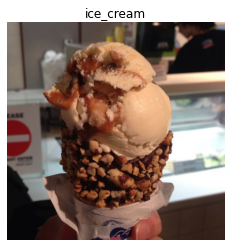

In [ ]:
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2) Preprocess the data (prepare it for a model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the `class_mode` parameter to `'categorical'` because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

> 🤔 **Question:** Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

**What is batches** ❓

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20). 

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.

### 3) Create a model (start with a baseline)


```
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])
```
**A typical CNN structure as below:**
```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

⏰ Things that different from binary classes:
* Changing output layer to use have 10 output neurons (the same number as the number of classes we have)
* Changing output layer to use `softmax` activation instead of `sigmoid` activation.
* Changing the loss function to be `categorical_crossentropy` instead of `binary_crossentropy`.


```
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])
```

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_3_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_3_1.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

### 4) Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
history_3_1 = model_3_1.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 201ms/step - loss: 2.2280 - accuracy: 0.1697 - val_loss: 2.1483 - val_accuracy: 0.2260
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 2.0756 - accuracy: 0.2565 - val_loss: 2.0140 - val_accuracy: 0.2696
Epoch 3/5
235/235 [==============================] - 47s 198ms/step - loss: 1.8196 - accuracy: 0.3792 - val_loss: 1.8871 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 47s 202ms/step - loss: 1.2536 - accuracy: 0.5853 - val_loss: 2.1193 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.5863 - accuracy: 0.8087 - val_loss: 2.9138 - val_accuracy: 0.3040


### 5) Evaluate the model

**Evaluate the model with TEST data**

In [ ]:
model_3_1.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 2.9138 - accuracy: 0.3040


[2.9138307571411133, 0.30399999022483826]

**Plot the model's accuracy and loss curves**

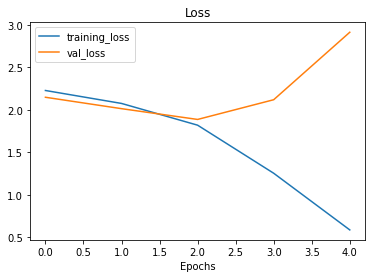

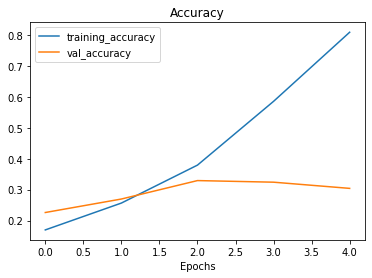

In [ ]:
plot_loss_curves(history_3_1)

🤒 Hmm...that is a big gap between the training and validation loss curves

What does this tell us?

It seems like our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6) Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

**Simplify the model** doesn't work as shown in the lecture, let's try to do some data augmentation! 🐲

#### Improve with data augmentation

Now we've got augmented data, let's see how it works with the same model as before (`model_10`).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) which can take an existing model and rebuild it in the same format. 

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

> 🔑 **Note:** One of the key practices in deep learning and machine learning in general is to **be a serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model - In other words, use the same architecture
model_3_2 = tf.keras.models.clone_model(model_3_1)

# Compile the cloned model
model_3_2.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# Fit the model
history_3_2 = model_3_2.fit(train_datagen_augmented, # use the augmented data
                            epochs=5,
                            steps_per_epoch=len(train_datagen_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 116s 492ms/step - loss: 2.2105 - accuracy: 0.1781 - val_loss: 2.0721 - val_accuracy: 0.2436
Epoch 2/5
235/235 [==============================] - 125s 531ms/step - loss: 2.0620 - accuracy: 0.2628 - val_loss: 1.9018 - val_accuracy: 0.3368
Epoch 3/5
235/235 [==============================] - 122s 517ms/step - loss: 1.9934 - accuracy: 0.3015 - val_loss: 1.8366 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 136s 574ms/step - loss: 1.9497 - accuracy: 0.3217 - val_loss: 1.8909 - val_accuracy: 0.3472
Epoch 5/5
235/235 [==============================] - 146s 621ms/step - loss: 1.9336 - accuracy: 0.3295 - val_loss: 1.7952 - val_accuracy: 0.3916


**Evaluate the augmented model again**

In [ ]:
model_3_2.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 1.7952 - accuracy: 0.3916


[1.795212745666504, 0.39160001277923584]

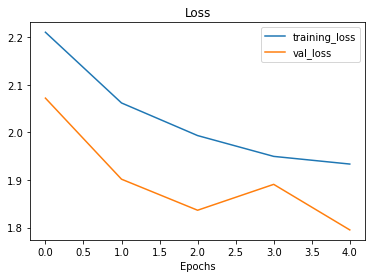

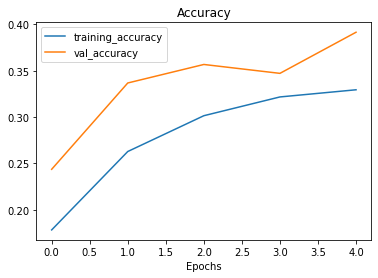

In [ ]:
plot_loss_curves(history_3_2)

### Check out our model's performance with augmented data
plot_loss_curves(history_3_2)

### 7) Repeat until satisfied
We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning**.

### 8) Making a prediction with our trained model

In [ ]:
# What classes has our model been trained on?
class_names

**Get some images from mrdbourke's github**

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Let's use the `pred_and_plot` function to make a prediction with the `model_3_2` (with data augmentation).

In [ ]:
from helper_functions import pred_and_plot

1/1 [==============================] - 0s 184ms/step


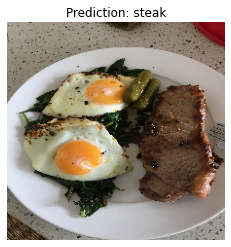

In [ ]:
# Make a prediction using model_3_2
pred_and_plot(model=model_3_2,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 16ms/step


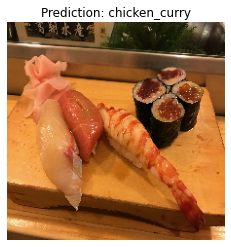

In [ ]:
pred_and_plot(model_3_2,"03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 16ms/step


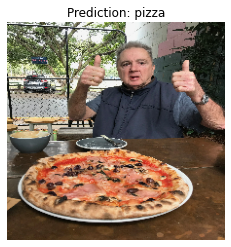

In [ ]:
pred_and_plot(model_3_2,"03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


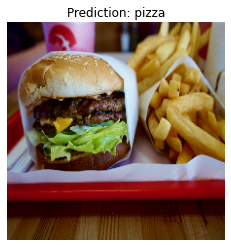

In [ ]:
pred_and_plot(model_3_2, "03-hamburger.jpeg", class_names)

### Saving and loading our model

Once you have trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) and [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load) functions.

In [ ]:
# Save a model
model_3_2.save("trained_model_3_2")

In [ ]:
# Load in a model and evaluate it
loaded_model_3_2 = tf.keras.models.load_model("trained_model_3_2")

In [ ]:
loaded_model_3_2.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.7952 - accuracy: 0.3916


[1.7952128648757935, 0.39160001277923584]

In [ ]:
# Compare our unsaved model_3_2's result (should be same as above)
model_3_2.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 1.7952 - accuracy: 0.3916


[1.795212745666504, 0.39160001277923584]

**Load model from Google Drive**

In [ ]:
loaded_model_3_2_drive = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Trained_Models/trained_model_3_2")

loaded_model_3_2_drive.evaluate(test_data)

79/79 [==============================] - 14s 173ms/step - loss: 1.7952 - accuracy: 0.3916


[1.7952131032943726, 0.39160001277923584]

## 4) Transfer Learning with Feature Extraction

**Transfer Learning** is taking the patterns (also called weights) from another model has learned from another problem and using them for our own problem.

There are two main benefits to using transfer learning:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has **already learned** patterns on similar data to our own. This often results in achieving great results with less custom data.

What this means is, instead of hand-crafting our own neural network architectures or building them from scratch, we can utilise models which have worked for others.

And instead of training our own models from scratch on our own datasets, we can take the patterns a model has learned from datasets such as [ImageNet](http://www.image-net.org/) (millions of images of different objects) and use them as the foundation of our own. Doing this often leads to getting great results with less data.

### Transfer learning with TensorFlow Hub:

[TensorFlow Hub](https://tfhub.dev/) is a repository for existing model components. It makes it so you can import and use a fully trained model with as little as a URL.

**Transfer learning often allows you to get great results with less data.**

Let's use 10% of the training data from the `10_food_classes` dataset
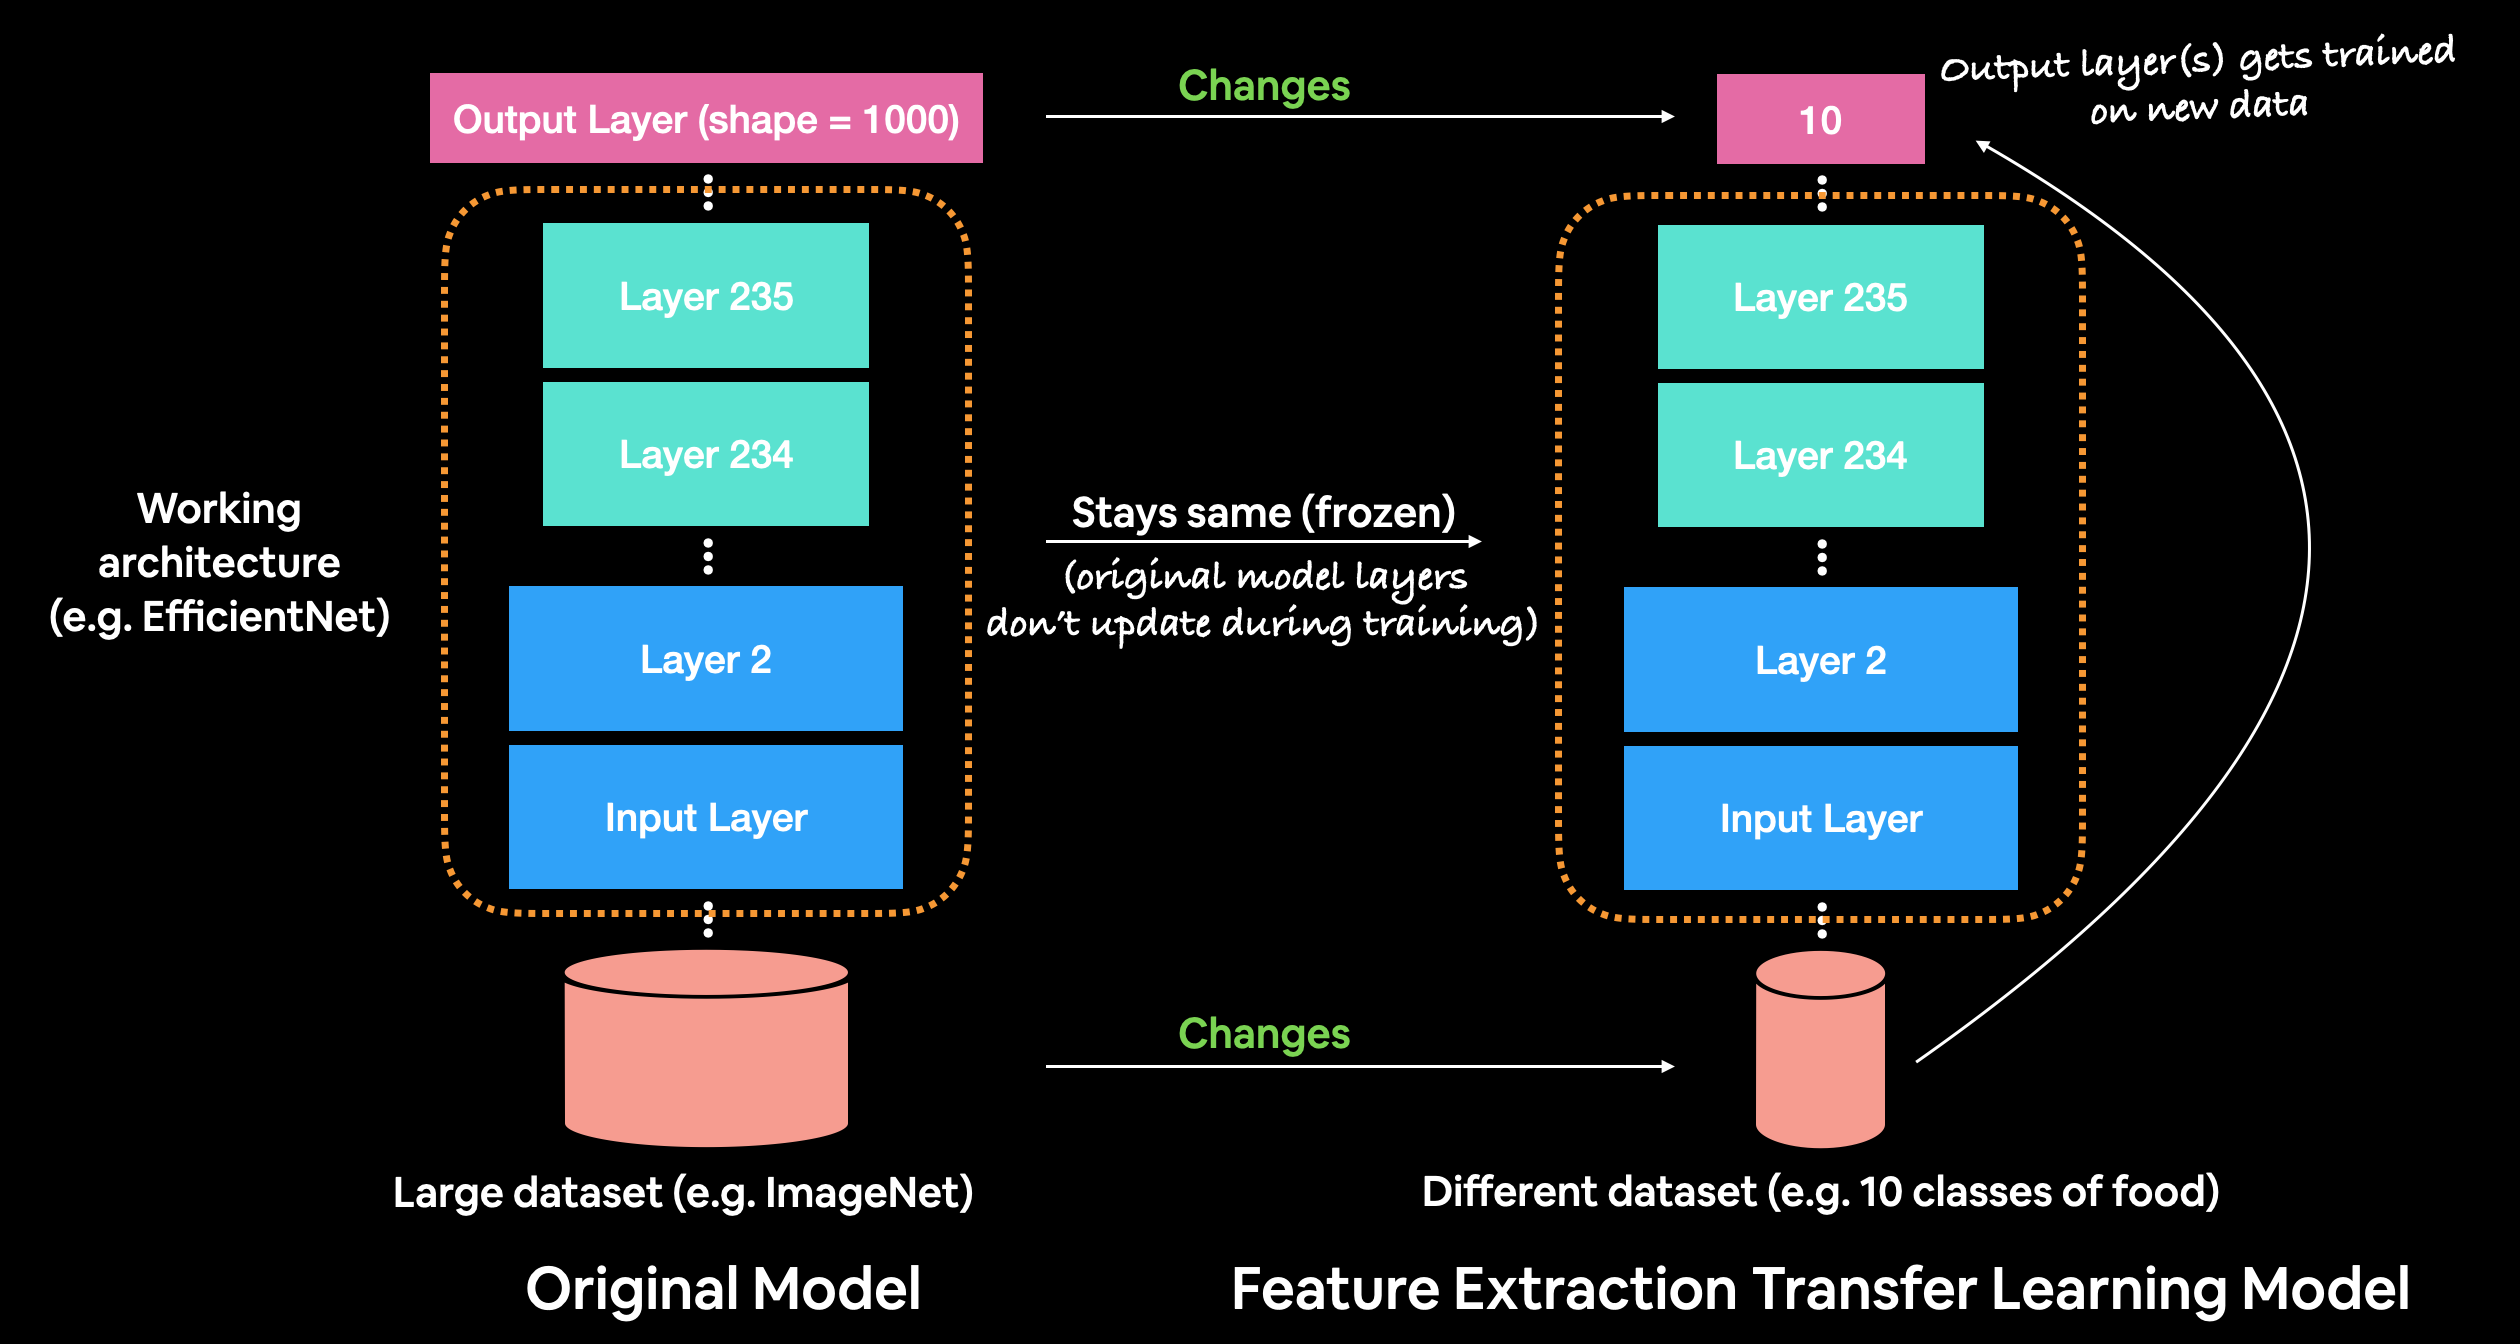

### 1) Import and become one with the data

**Get the 10% of data labels** 

In [1]:
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-14 06:35:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  20.5MB/s    in 9.0s    

2022-12-14 06:35:23 (17.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



**Check out all the different directories and sub-directories in the folder**

Now, the training directories only have 75 images rather than 750 images. The testing directories still have the same amount of images as before (750 images), this means we will be training on less data but evaluating our models on the same amount of test data.



In [2]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

### 2) Preprocess the data (prepare it for a model)

Now we've downloaded the data, let's use the [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class along with the `flow_from_directory` method to load in our images.

In [3]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/train/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing Images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training Images:
Found 750 images belonging to 10 classes.
Testing Images:
Found 750 images belonging to 10 classes.


### 3) Setting up callbacks (things to run whilst our model trains)

The concept **Callbacks** is going to play a key role in our future model building experiments.

[Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include:
* [**Experiment tracking with TensorBoard**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - log the performance of multiple models and then view and compare these models in a visual way on [TensorBoard](https://www.tensorflow.org/tensorboard) (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data.
* [**Model checkpointing**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.
* [**Early stopping**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.

The TensorBoard callback can be accessed using [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard). 

Its main functionality is saving a model's training performance metrics to a specified `log_dir`. By default, logs are recorded every epoch using the `update_feq='epoch'`parameter. This is a good default since tracking model performance too often can slow down model training.

To track our modelling experiments using TensorBoard, let's create a function which creates a TensorBoard callback for us.
> 🔑 **Note** We create a function for creating a TensorBoard callback because as we will see later on, each model needs its own TensorBoard callback instance (so the function will create a new one each time it's run).

In [2]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )

  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


Because you're likely to run multiple experiments, it's a good idea to be able to track them in some way.

In our case, our function saves a model's performance logs to a directory named `[dir_name]/[experiment_name]/[current_timestamp]`, where:
* `dir_name` is the overall logs directory
* `experiment_name` is the particular experiment
* `current_timestamp` is the time the experiment started based on Python's [`datetime.datetime().now()`](https://docs.python.org/3/library/datetime.html#datetime.datetime.now)

> 🔑 **Note:** Depending on your use case, the above experimenting tracking naming method may work or you might require something more specific. The good news is, the TensorBoard callback makes it easy to track modelling logs as long as you specify where to track them. So you can get as creative as you like with how you name your experiments, just make sure you or your team can understand them.


### 4) Creating models using TensorFlow Hub (ResNetV2 and EfficientNet)